# Colour-coding statistical areas by growth-rate

We're gonna take a 2 column table that I made in excel (SA2 code and Growth Rate) and link it to the ABS Statistical Areas shapefile which you can get on the internet. The we're gonna make a map showing SA2s colour-coded by growth rate. Firstly here's some imports so you can get the python modules you need:

In [1]:
%matplotlib inline

import sys

import datacube
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import ipyleaflet as ipyl
import ipywidgets as ipyw
import json


import matplotlib as mpl
import matplotlib.colors
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from colorspacious import cspace_converter
from collections import OrderedDict
from branca.colormap import linear

cmaps = OrderedDict()



### Organising the data and linking it to the shapefile

In [7]:
#This should have the SA2 code and the variable you're interested in eg. growth rate 2013 - 2018
csv_file_location = 'ABS_xls_files/SA2_growth_rate_outliers_deleted.csv' 

#This is the SA2 shapefile so you can make a map out of it. Also has SA3 and SA4 polygons, but I'll delete them
shp_file_location = 'ABS_shapefiles/SA2_2016_AUST.shp'

#Organise the data for merging
gdf = gpd.read_file(shp_file_location)
df = pd.read_csv(csv_file_location)
df = df.rename(columns={'SA2 code':'SA2'})
df = df.set_index("SA2")
gdf = gdf.rename(columns={'SA2_MAIN16':'SA2'})
gdf = gdf.set_index('SA2')
gdf = gdf.drop(columns=['SA2_5DIG16', 'SA2_NAME16', 'SA3_CODE16', 'SA3_NAME16', 'SA4_CODE16', 'SA4_NAME16',
                        'GCC_CODE16', 'GCC_NAME16', 'STE_CODE16', 'STE_NAME16', 'AREASQKM16'])

#Merge growth rate with SA2
pd_merged = pd.merge(gdf, df, how='inner', on=df.index, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

#You have now created a geopandas dataframe with the polygon for the map and the values of the variable you were interested in
pd_merged = pd_merged.rename(columns={'key_0':'SA2'})
pd_merged = pd_merged.rename(columns={'5 year growth rate':'growthrate'})
pd_merged = pd_merged.drop(columns=['Unnamed: 2'])
pd_merged.head(1)

,SA2,geometry,growthrate
0,101021007,"POLYGON ((150.87031 -33.74281, 150.87021 -33.7...",2.4


### Now plot it with matplotlib

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


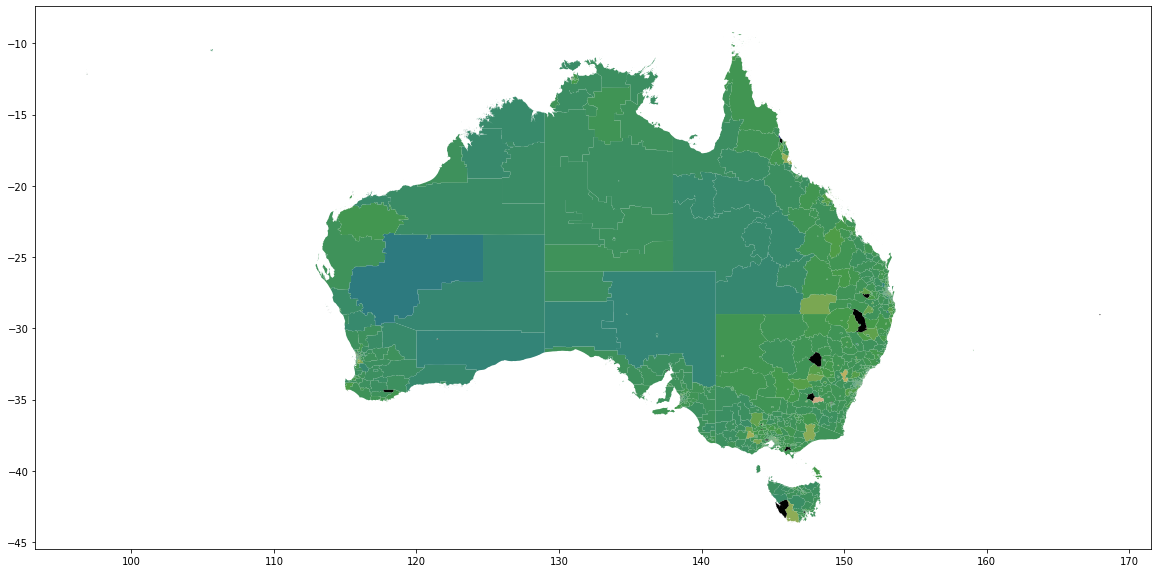

In [8]:
pd_merged.plot(column='growthrate', 
               cmap='gist_earth',
               figsize = (20,20))

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


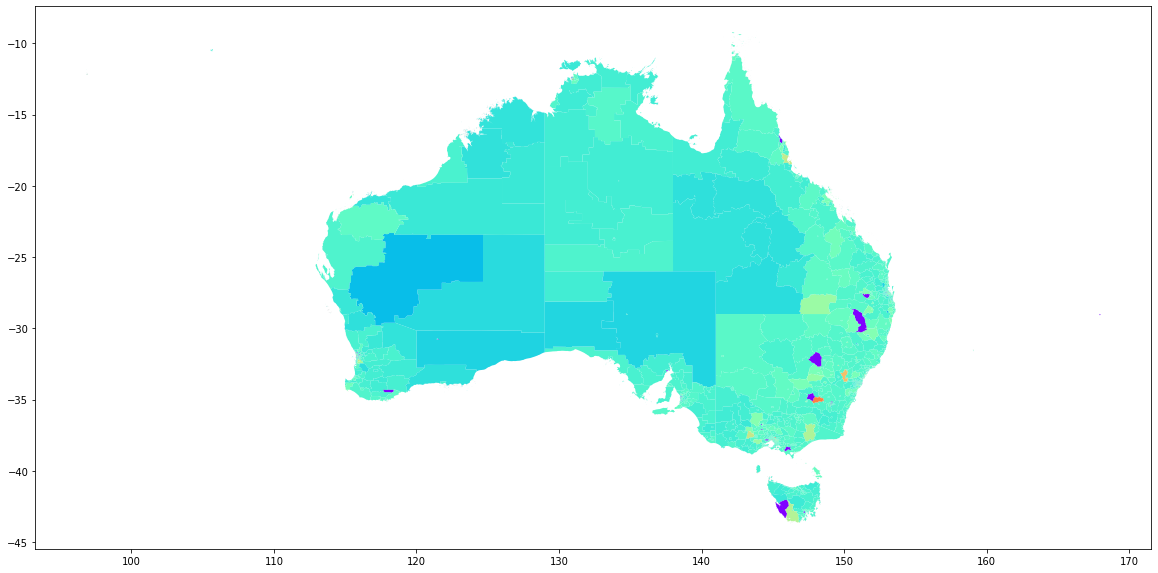

In [14]:
pd_merged.plot(column='growthrate', 
               cmap='rainbow',
               figsize = (20,20))

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


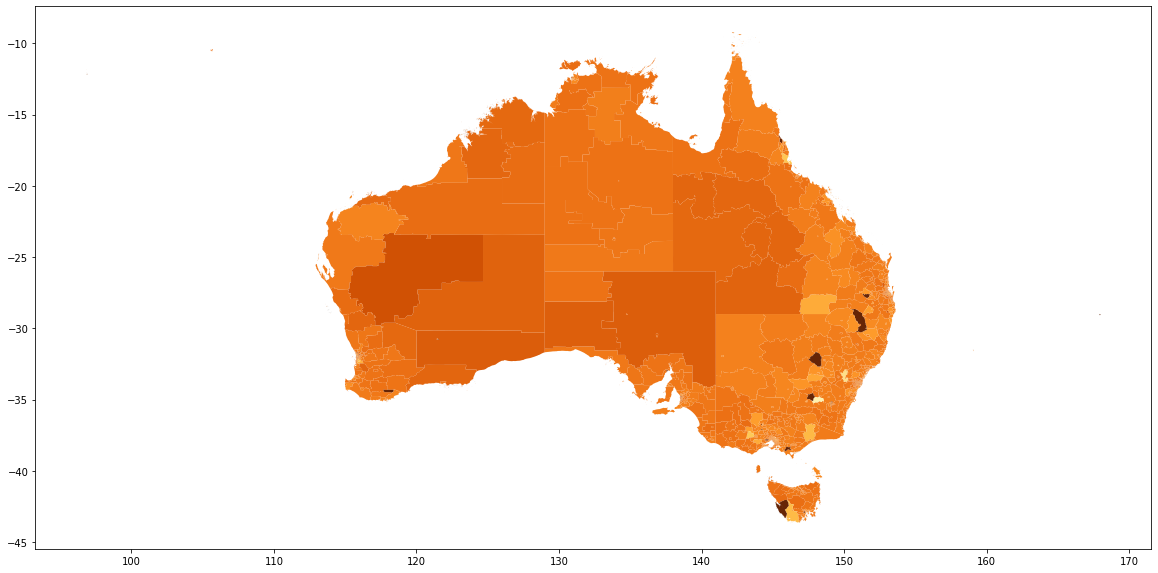

In [11]:
pd_merged.plot(column='growthrate', 
               cmap='YlOrBr_r',
               figsize = (20,20))